In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 14 14:36:51 2018
Initial Experiments on visualizing the data
@author: shrey
"""

import numpy as np
from gensim import corpora, models
import gensim
import csv
import _pickle as cPickle
from sklearn.externals import joblib
import bz2
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats
get_ipython().magic('pylab inline')


path = '/Users/shrey/AnacondaProjects/Application_reviews/Experiments/CNN/'
dictionary = gensim.corpora.Dictionary.load_from_text(path + 'Dictionary/dictionary.txt')
corpus = gensim.corpora.MmCorpus(path + 'DTMcorpora/DTM.mm')
lda = joblib.load(path + 'LDAmodel/lda.pkl')
print (len(corpus))

Populating the interactive namespace from numpy and matplotlib
74109


In [2]:
print(lda[corpus[1]])

[(6, 0.26405805), (17, 0.33785218), (19, 0.22808976)]


In [3]:
color = [] # color is an array that stores the most likely topic a document(comment) belongs to
i = 0
for corpus_line in corpus:
    if i < 5:
        print (lda[corpus_line])
    sorted_topic_line = list(sorted(lda[corpus_line], key=lambda x: x[1], reverse=True))
    color.append(sorted_topic_line[0][0])
    i += 1

# create a output array of number of docs size, each entry contains a vec of topic probabilities
lda_output = []
for line in corpus:
    lda_output.append(lda[line])
    
topics_data = np.zeros(shape=(len(corpus),50))

for i, line in enumerate(lda_output):
    for topic_line in line:
            topics_data[i][topic_line[0]] = topic_line[1]
print (len(color))
print(topics_data[1])



[(0, 0.025), (1, 0.025), (2, 0.025), (3, 0.025), (4, 0.025), (5, 0.025), (6, 0.025), (7, 0.025), (8, 0.025), (9, 0.025), (10, 0.025), (11, 0.025), (12, 0.025), (13, 0.025), (14, 0.025), (15, 0.025), (16, 0.025), (17, 0.525), (18, 0.025), (19, 0.025)]
[(6, 0.2617412), (17, 0.3306976), (19, 0.2375612)]
[(3, 0.40785602), (9, 0.175), (18, 0.27547732)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.68333334), (7, 0.016666668), (8, 0.016666668), (9, 0.01666667), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668), (15, 0.016666668), (16, 0.016666668), (17, 0.016666668), (18, 0.016666668), (19, 0.016666668)]
[(4, 0.23639832), (5, 0.36830035), (11, 0.30085686)]
74109
[0.         0.         0.         0.         0.         0.
 0.30095062 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.51904935
 0.         0.01       0.         0. 

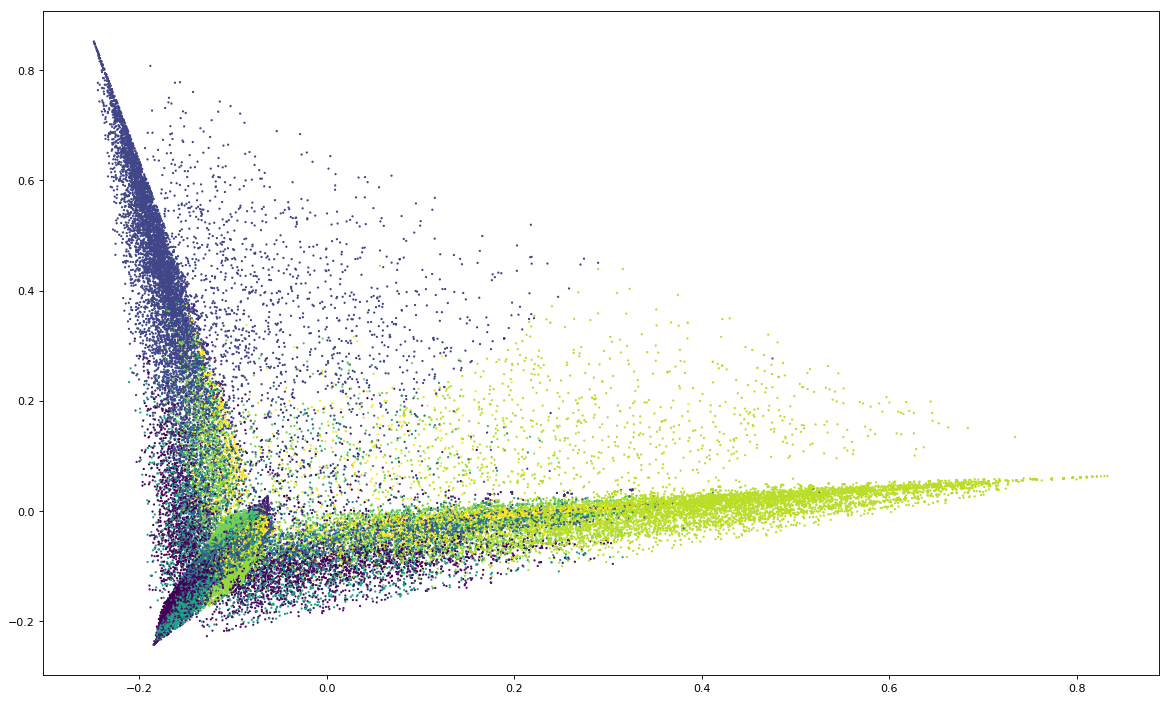

In [4]:
X_pca = PCA().fit_transform(topics_data )
figure(num=None, figsize=(18, 11), dpi=80, facecolor='w', edgecolor='k')
scatter(X_pca[:, 0], X_pca[:, 1], c=color,s=1)

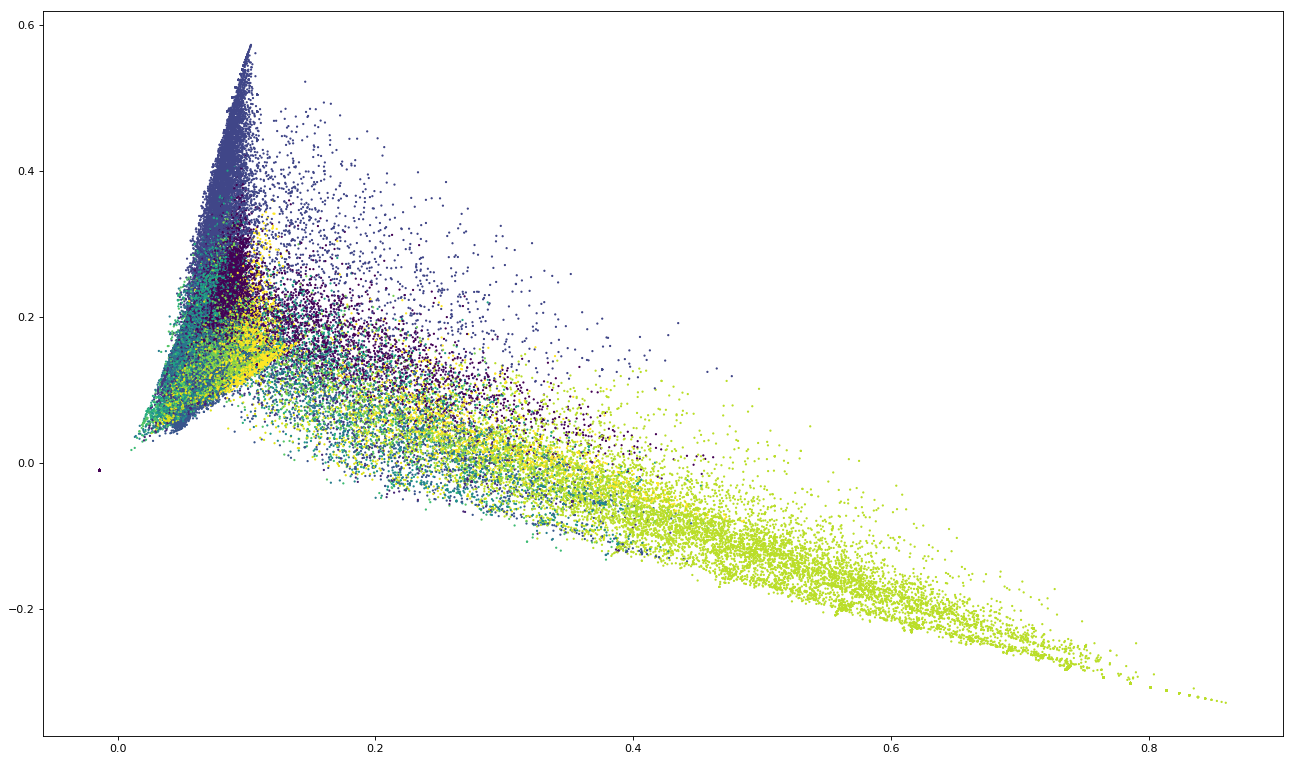

In [7]:
topics_data = np.zeros(shape=(1000000,50))

for i, line in enumerate(lda_output):
    for topic_line in line:
            topics_data[i][topic_line[0]] = topic_line[1]
            
topics_data_norm  = topics_data

color = []
for line in topics_data_norm:
    color_number =[i for i, j in enumerate(line) if j == max(line)]
    color.append(int(color_number[0]))

X_pca = PCA().fit_transform(topics_data_norm )
figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
scatter(X_pca[:, 0], X_pca[:, 1], c=color,s=1)




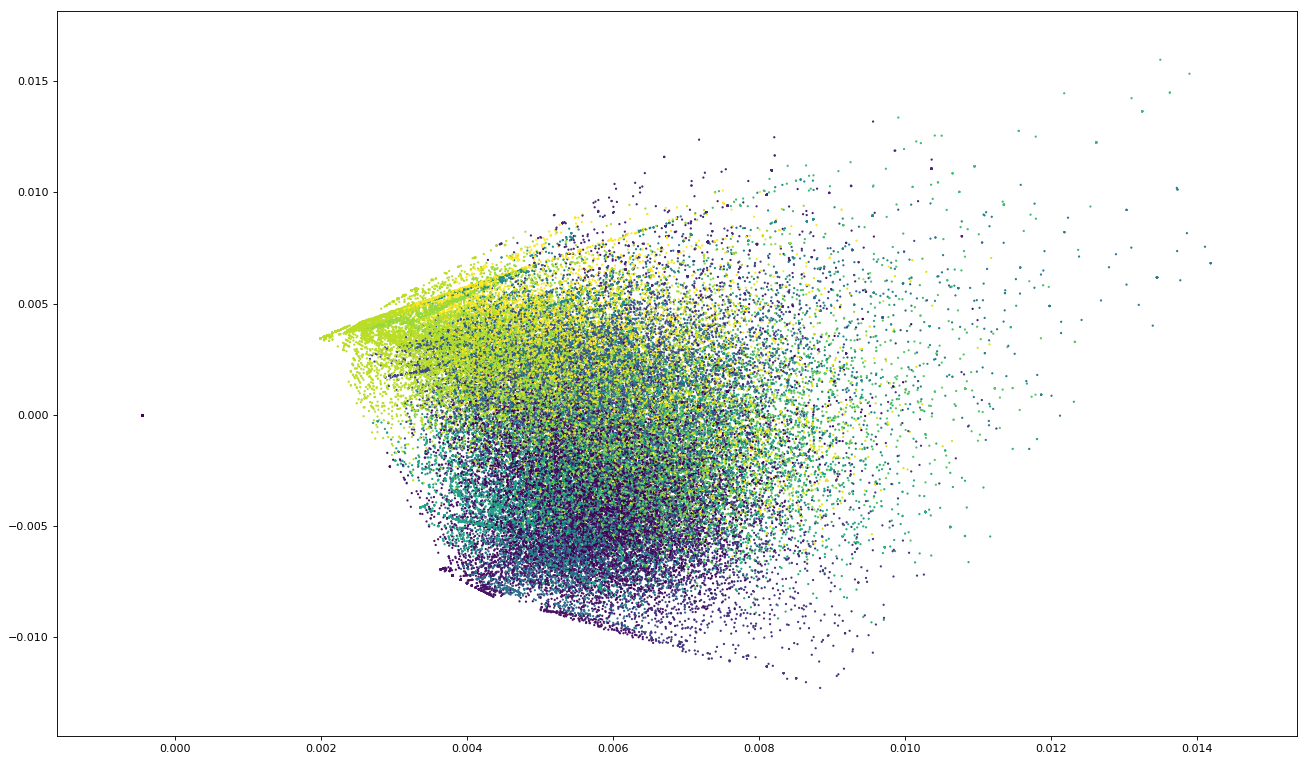

In [11]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
topics_data_norm  = normalize(topics_data, axis=0)

X_pca = PCA().fit_transform(topics_data_norm )
figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
scatter(X_pca[:, 0], X_pca[:, 1], c=color,s=1)

[(0, 0.025), (1, 0.025), (2, 0.025), (3, 0.025), (4, 0.025), (5, 0.025), (6, 0.025), (7, 0.025), (8, 0.025), (9, 0.025), (10, 0.025), (11, 0.025), (12, 0.025), (13, 0.025), (14, 0.025), (15, 0.025), (16, 0.025), (17, 0.525), (18, 0.025), (19, 0.025)]
[(6, 0.26526642), (17, 0.3422064), (19, 0.22252722)]
[(3, 0.40779024), (9, 0.17499998), (18, 0.27554312)]
[(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.68333334), (7, 0.016666668), (8, 0.016666668), (9, 0.016666671), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668), (15, 0.016666668), (16, 0.016666668), (17, 0.016666668), (18, 0.016666668), (19, 0.016666668)]
[(4, 0.23627496), (5, 0.36840597), (11, 0.3008746)]
74109
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 74109 samples in 9.073s...
[t-SNE] Computed neighbors for 74109 samples in 279.260s...
[t-SNE] Computed conditional probabilities for sample 1000 / 74109
[t-

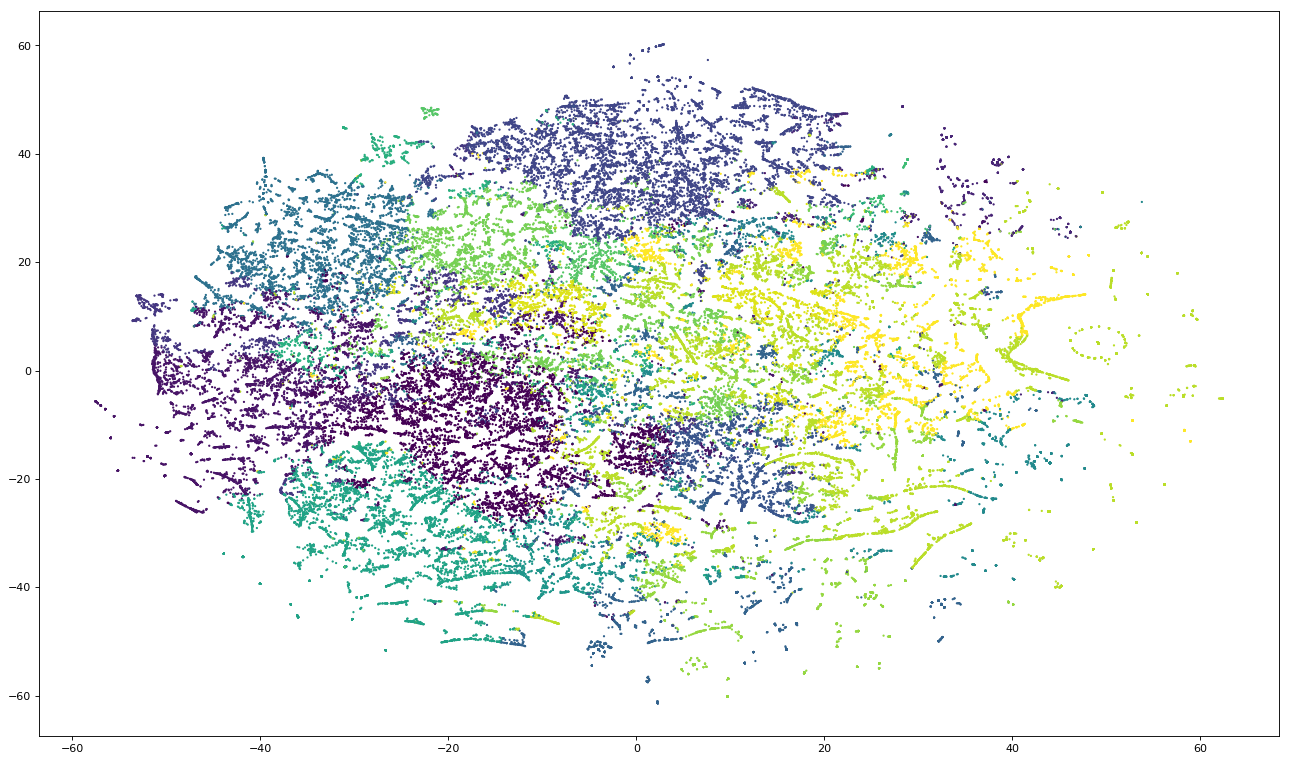

In [4]:
import pickle
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
color = [] # color is an array that stores the most likely topic a document(comment) belongs to
i = 0
for corpus_line in corpus:
    if i < 5:
        print (lda[corpus_line])
    sorted_topic_line = list(sorted(lda[corpus_line], key=lambda x: x[1], reverse=True))
    color.append(sorted_topic_line[0][0])
    i += 1

# create a output array of number of docs size, each entry contains a vec of topic probabilities
lda_output = []
for line in corpus:
    lda_output.append(lda[line])
    
topics_data = np.zeros(shape=(len(corpus),50))

for i, line in enumerate(lda_output):
    for topic_line in line:
            topics_data[i][topic_line[0]] = topic_line[1]
print (len(color))

topics_data_norm  = normalize(topics_data, axis=0)

tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(topics_data_norm )

with open (path + "TSNEmodel/lda.mo",'wb') as f:
    pickle.dump(tsne_lda,f)

figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
scatter(tsne_lda[:, 0], tsne_lda[:, 1], c=color,s=1)
print(tsne_lda)

[17, 24, 173, 2, 10, 4, 3, 27, 383, 12, 78, 35, 44, 13, 100, 20, 15, 0, 5, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


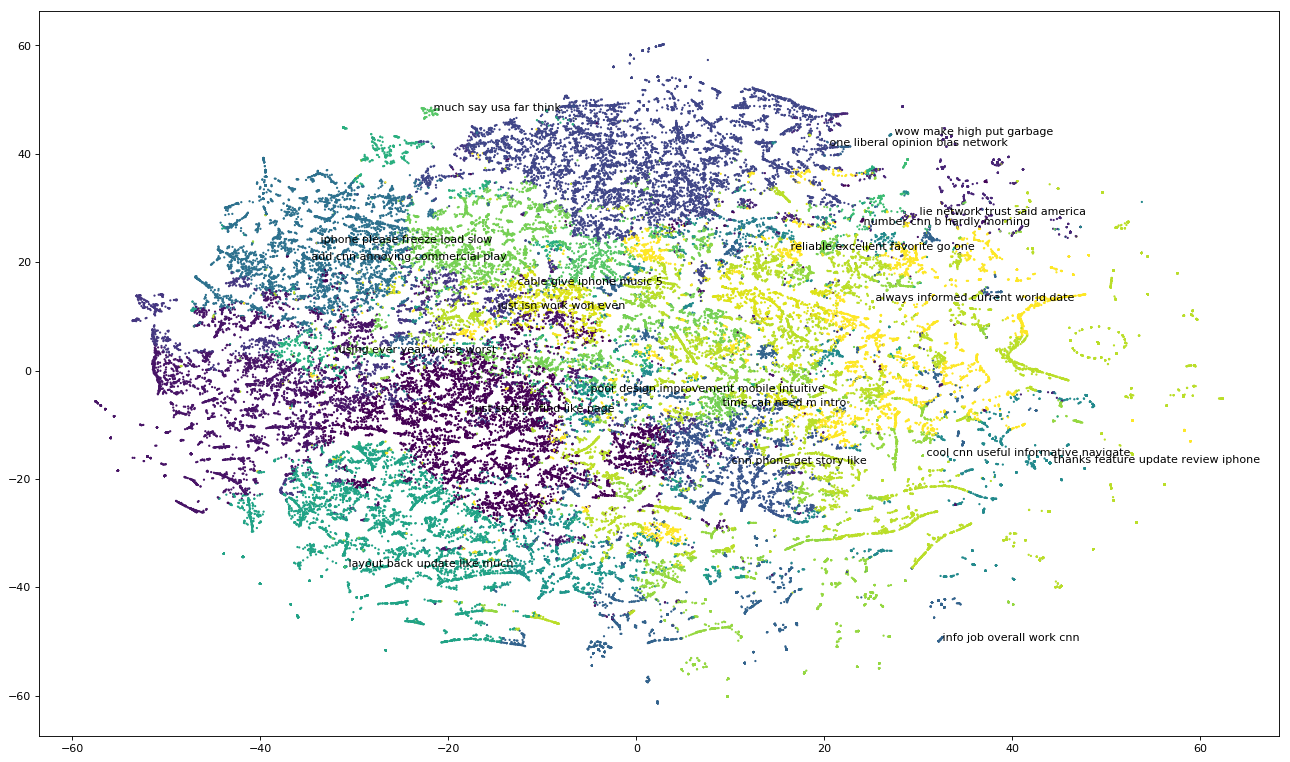

In [6]:
#print(lda.get_topic_terms(0))
figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
ann = {}
for cou, i in enumerate(color):
    if i not in ann:
        ann[i] = cou
l = [0 for x in range(50)]
for i in ann:
    l[i] = ann[i]
print(l)   
for i in range(20):
    terms = lda.get_topic_terms(i)
    words = [j[0] for j in sorted(terms,key=lambda x: x[1])][:5]
    s = ""
    for k in words:
        s = s + " " + dictionary[k]
    #print(s)
    annotate(s, xy=(tsne_lda[l[i]][0], tsne_lda[l[i]][1]))
    
scatter(tsne_lda[:, 0], tsne_lda[:, 1], c=color,s=1)
#corpus[0]


In [73]:
len(tsne_lda)

10000